# Agrupamiento (Clustering) y aprendizaje no supervisado / Aplicaciones

# 1. Selección de un dataset con más de 100 carácteristicas

Se eligió ISOLET que es un conjunto de datos para el reconocimiento de letras del alfabeto habladas, contiene 617 características y 26 clases (una para cada letra del alfabeto).

In [ ]:
import pandas as pd

# Ruta de los archivos de datos
data_file_path_1 = 'isolet1234.data'
data_file_path_2 = 'isolet5.data'

# Cargar los datos en DataFrames
column_names = [f'feature_{i}' for i in range(1, 618)] + ['label']  # 617 features + 1 label

# Leer los archivos de datos, tratando los espacios en blanco como NaN
df1 = pd.read_csv(data_file_path_1, header=None, names=column_names, na_values=' ')
df2 = pd.read_csv(data_file_path_2, header=None, names=column_names, na_values=' ')

# Combinar los DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Verificar y limpiar datos
df = df.dropna()  # Eliminar filas con NaN
df = df.apply(pd.to_numeric, errors='coerce')  # Convertir todo a numérico, coerce convierte errores a NaN
df = df.dropna()  # Eliminar filas con NaN resultantes de la conversión

print("Datos cargados y limpiados:", df.head())

Datos cargados y limpiados:    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -0.4394    -0.0930     0.1718     0.4620     0.6226     0.4704   
1    -0.4348    -0.1198     0.2474     0.4036     0.5026     0.6328   
2    -0.2330     0.2124     0.5014     0.5222    -0.3422    -0.5840   
3    -0.3808    -0.0096     0.2602     0.2554    -0.4290    -0.6746   
4    -0.3412     0.0946     0.6082     0.6216    -0.1622    -0.3784   

   feature_7  feature_8  feature_9  feature_10  ...  feature_609  feature_610  \
0     0.3578     0.0478    -0.1184     -0.2310  ...       0.4102       0.2052   
1     0.4948     0.0338    -0.0520     -0.1302  ...       0.0000       0.2954   
2    -0.7168    -0.6342    -0.8614     -0.8318  ...      -0.1112      -0.0476   
3    -0.6868    -0.6650    -0.8410     -0.9614  ...      -0.0504      -0.0360   
4    -0.4324    -0.4358    -0.4966     -0.5406  ...       0.1562       0.3124   

   feature_611  feature_612  feature_613  feature_614  fea

# 2. PCA

Varianza explicada por cada componente: [0.24964919 0.08842485]
Varianza explicada acumulada: [0.24964919 0.33807404]


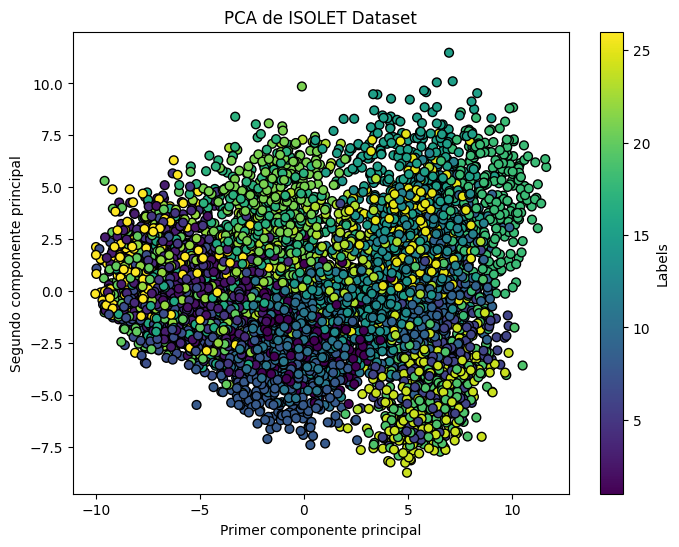

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separar las características y las etiquetas
X = df.drop('label', axis=1)
y = df['label']

# Aplicar PCA
pca = PCA(n_components=2)  # Ajustar el número de componentes
X_pca = pca.fit_transform(X)

# Visualizar la variabilidad explicada
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", explained_variance.cumsum())

# Visualizar los resultados del PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA de ISOLET Dataset')
plt.colorbar(scatter, label='Labels')
plt.show()

In [ ]:
# Elegir el número de componentes basado en la variabilidad explicada acumulada
desired_variance = 0.95  # Por ejemplo, queremos explicar el 95% de la variabilidad total
pca = PCA().fit(X)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = next(i for i, total_variance in enumerate(cumulative_variance) if total_variance >= desired_variance) + 1

print(f"Para explicar el {desired_variance*100}% de la variabilidad, se necesitan {num_components} componentes principales.")

Para explicar el 95.0% de la variabilidad, se necesitan 173 componentes principales.


Para justificar la elección de la cantidad de dimensiones resultantes, nos basamos en dos factores clave:

Variabilidad explicada acumulada:

Aplicamos PCA y seleccionamos el número de componentes que explican al menos el 95% de la variabilidad total. Esto asegura que mantenemos la mayor parte de la información relevante mientras reducimos significativamente la dimensionalidad de los datos.

Importancia de las características:

Los componentes principales capturan las características más influyentes de los datos. Al reducir la dimensionalidad, eliminamos el ruido y las redundancias, enfocándonos en las características que más contribuyen a la estructura de los datos.

Este enfoque facilita la visualización y análisis posterior, asegurando que las características más significativas se mantengan en las nuevas dimensiones.

# 3. Técnica de Clustering


Vamos a usar K-Means para hacer clustering por lo siguiente:

Simplicidad y eficacia: \\
K-Means es fácil de implementar y eficiente para grandes conjuntos de datos con muchas características.

Asunción de forma de clusters: \\
K-Means asume que los clusters tienen una forma esférica y similar tamaño, lo cual es razonable para el conjunto de datos ISOLET dado que se espera que las características de las letras pronunciadas formen grupos distintivos y separables.

Interpretabilidad: \\
Los resultados de K-Means son fáciles de interpretar y visualizar, especialmente después de aplicar PCA para reducir la dimensionalidad.

Coeficiente de silueta para 26 clusters: 0.3303032761367355


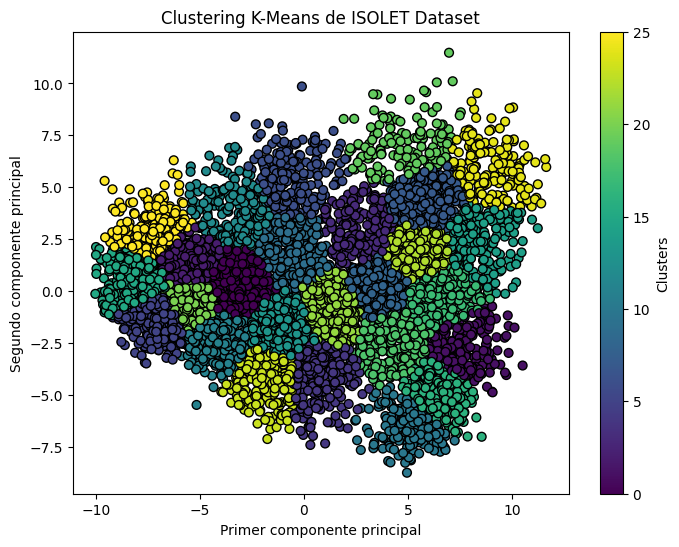

In [ ]:
# Aplicar K-Means
num_clusters = 26  # ISOLET tiene 26 clases (A-Z)
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Evaluar la calidad del clustering
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Coeficiente de silueta para {num_clusters} clusters: {silhouette_avg}")

# Visualizar los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Clustering K-Means de ISOLET Dataset')
plt.colorbar(scatter, label='Clusters')
plt.show()


 Los clusters formados por K-Means son fáciles de interpretar, y el coeficiente de silueta nos proporciona una métrica para evaluar la calidad del clustering.

  La visualización de los clusters en el espacio reducido de PCA facilita la comprensión de la estructura de los datos y la separación entre diferentes clases.

# 4. Experimentando y evaluando

Clusters: 2, Inercia: 129607.56949924616, Coeficiente de silueta: 0.4920068989610294
Clusters: 3, Inercia: 88247.05248982226, Coeficiente de silueta: 0.4508573528558424
Clusters: 4, Inercia: 63825.75849264402, Coeficiente de silueta: 0.4277473996528263
Clusters: 5, Inercia: 48397.04701704459, Coeficiente de silueta: 0.45103120798233715
Clusters: 6, Inercia: 39522.73025485904, Coeficiente de silueta: 0.4425923308682353
Clusters: 7, Inercia: 34714.986117678665, Coeficiente de silueta: 0.37626648868872997
Clusters: 8, Inercia: 31083.050417246413, Coeficiente de silueta: 0.3648106705818753
Clusters: 9, Inercia: 28096.79158889447, Coeficiente de silueta: 0.36067618724211664
Clusters: 10, Inercia: 25406.385360525965, Coeficiente de silueta: 0.35825906393478774
Clusters: 11, Inercia: 23422.028776175175, Coeficiente de silueta: 0.35074369953580947
Clusters: 12, Inercia: 21598.49742151949, Coeficiente de silueta: 0.35139838525727607
Clusters: 13, Inercia: 20117.523522761716, Coeficiente de silu

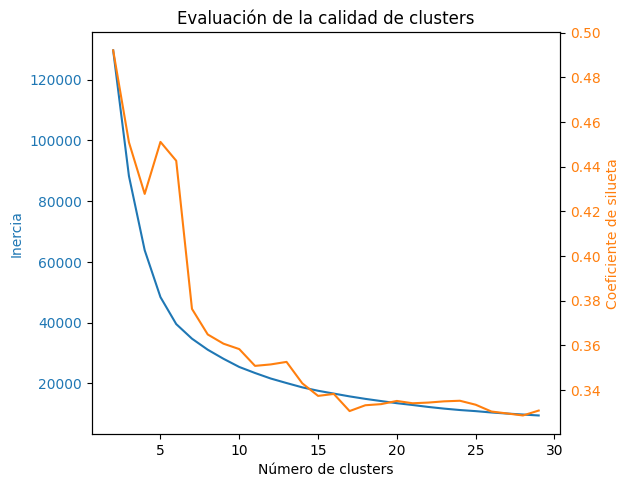

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de números de clusters a probar
cluster_range = range(2, 30)
inertia = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"Clusters: {num_clusters}, Inercia: {kmeans.inertia_}, Coeficiente de silueta: {silhouette_avg}")

# Graficar inercia y coeficiente de silueta
fig, ax1 = plt.subplots()

ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Inercia', color='tab:blue')
ax1.plot(cluster_range, inertia, label='Inercia', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Coeficiente de silueta', color='tab:orange')
ax2.plot(cluster_range, silhouette_scores, label='Coeficiente de silueta', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Evaluación de la calidad de clusters')
plt.show()

Considerando tanto la inercia como el coeficiente de silueta, una elección razonable sería elegir el número de clusters donde ambas métricas son balanceadas. Aquí, podemos ver que:

4 a 6 clusters: El coeficiente de silueta es más alto en este rango, indicando buena cohesión y separación de clusters.
8 a 10 clusters: La inercia muestra un "codo" en este rango, indicando una reducción significativa en la inercia antes de estabilizarse.

Para equilibrar ambas métricas, una opción razonable sería elegir 6 clusters, ademas de que podría ofrecer una mejor interpretación y separación de datos complejos, como en este caso.

Coeficiente de silueta para 6 clusters: 0.4425923308682353


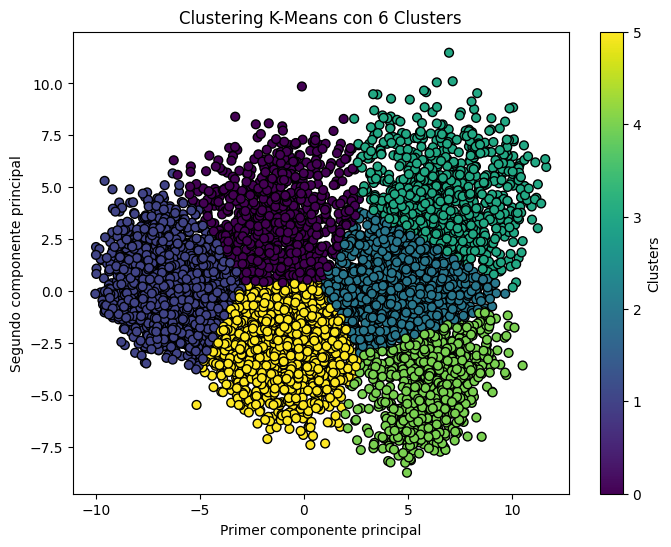

In [ ]:
# Selección final del número de clusters
optimal_clusters = 6
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters_optimal = kmeans_optimal.fit_predict(X_pca)

# Evaluar la calidad de los clusters seleccionados
silhouette_avg_optimal = silhouette_score(X_pca, clusters_optimal)
print(f"Coeficiente de silueta para {optimal_clusters} clusters: {silhouette_avg_optimal}")

# Visualizar los clusters seleccionados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_optimal, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title(f'Clustering K-Means con {optimal_clusters} Clusters')
plt.colorbar(scatter, label='Clusters')
plt.show()

# 5. Interpretación de los grupos formados

In [ ]:
import numpy as np

# Interpretación de los clusters
for cluster in range(optimal_clusters):
    cluster_points = np.sum(clusters_optimal == cluster)
    print(f"Cluster {cluster + 1}: {cluster_points} puntos")

# Comparar los clusters con las etiquetas originales
comparison = pd.crosstab(df['label'], clusters_optimal, rownames=['Etiqueta real'], colnames=['Cluster asignado'])
print(comparison)

Cluster 1: 850 puntos
Cluster 2: 2401 puntos
Cluster 3: 1265 puntos
Cluster 4: 918 puntos
Cluster 5: 965 puntos
Cluster 6: 1398 puntos
Cluster asignado    0    1    2    3    4    5
Etiqueta real                                 
1.0                14    1   31    0    6  248
2.0                17  232    0    0    0   51
3.0                 8  271    0    0    0   21
4.0                 9  269    0    0    0   22
5.0                10  278    0    0    0   12
6.0                 1    0   37    2  257    1
7.0                 4  270    1    0    0   25
8.0                 1    7    1    0    4  287
9.0                 0    0  186   36   78    0
10.0               11   13   11    0    0  265
11.0                7    4   35    0    6  248
12.0                1    0  135  162    2    0
13.0                7    0  227   50   11    4
14.0               27    0  211    9    8   45
15.0               20    0   44  235    1    0
16.0               15  248    0    0    0   37
17.0              2

Observemos que el Cluster 2 (numero 1) tiene 2401 puntos.

Su distribución de etiquetas es:

Principalmente etiqueta 2 (232 puntos), \\
etiqueta 3 (271 puntos), \\
etiqueta 4 (269 puntos), \\
etiqueta 5 (278 puntos), \\
etiqueta 7 (270 puntos), y \\
etiqueta 16 (248 puntos).

Interpretación:

Cluster 2 (1) agrupa muchas etiquetas diferentes con un número significativo de puntos, especialmente etiquetas 2, 3, 4, 5, 7, y 16. \\
Esto podría indicar que estas letras tienen características fonéticas similares o que hay una superposición en sus características fonéticas que hacen que se agrupan juntas.

# 6. Comparación de clusters en terminos de similitud con etiquetas

In [ ]:
for cluster in range(optimal_clusters):
    cluster_points = np.sum(clusters_optimal == cluster)
    label_distribution = comparison[cluster].idxmax()
    max_label_count = comparison[cluster].max()
    max_label_percentage = max_label_count / cluster_points * 100
    print(f"Cluster {cluster + 1}:")
    print(f" - Total puntos: {cluster_points}")
    print(f" - Etiqueta predominante: {label_distribution}")
    print(f" - Puntos de la etiqueta predominante: {max_label_count} ({max_label_percentage:.2f}%)")
    print()

Cluster 1:
 - Total puntos: 850
 - Etiqueta predominante: 21.0
 - Puntos de la etiqueta predominante: 283 (33.29%)

Cluster 2:
 - Total puntos: 2401
 - Etiqueta predominante: 5.0
 - Puntos de la etiqueta predominante: 278 (11.58%)

Cluster 3:
 - Total puntos: 1265
 - Etiqueta predominante: 13.0
 - Puntos de la etiqueta predominante: 227 (17.94%)

Cluster 4:
 - Total puntos: 918
 - Etiqueta predominante: 18.0
 - Puntos de la etiqueta predominante: 273 (29.74%)

Cluster 5:
 - Total puntos: 965
 - Etiqueta predominante: 24.0
 - Puntos de la etiqueta predominante: 296 (30.67%)

Cluster 6:
 - Total puntos: 1398
 - Etiqueta predominante: 8.0
 - Puntos de la etiqueta predominante: 287 (20.53%)



Análizando los resultados podemos ver que los clusters 1, 4, 5 y 6 muestran un buen rendimiento en términos de similitud con las etiquetas, ya que tienen una alta concentración de una sola etiqueta predominante.

# 7. Clusters con peor rendimiento.

El cluster 2 agrupa varias etiquetas sin una predominancia clara, indicando que las letras en este cluster tienen características fonéticas más similares y menos diferenciadas.

**Posibles razones del bajo rendimiento**

\\

Similaridad de Características:

Cuando las características de las letras fonéticas son muy similares, el modelo de clustering tiene dificultad para separarlas en diferentes clusters. Esto se observa en los clusters 2 y 6, donde múltiples etiquetas están agrupadas juntas.

\\

Limitaciones del PCA:

La reducción de dimensionalidad con PCA puede no haber capturado todas las características importantes necesarias para diferenciar las letras. PCA busca maximizar la varianza explicada, pero puede perder características que son cruciales para separar ciertas letras fonéticas.

\\

Limitaciones del K-Means:

K-Means asume clusters esféricos de tamaño similar. Si las letras fonéticas tienen distribuciones de características que no son esféricas o tienen tamaños de clusters muy diferentes, K-Means puede no capturar bien la estructura de los datos.

\\

Superposición de Clases:

Algunas letras fonéticas pueden tener patrones que se superponen en el espacio de características, lo que hace difícil separarlas claramente. Esto resulta en clusters con una mezcla de varias etiquetas.

# Cierre

  Las herramientas y técnicas utilizadas demostraron ser efectivas, pero también revelaron las limitaciones y desafíos que enfrentamos al trabajar con datos fonéticos complejos.
  
 Para mejorar, se podría considerar usar técnicas de reducción de dimensionalidad y clustering más avanzadas que puedan capturar mejor las diferencias sutiles en las características fonéticas de las letras.